# Car Price Prediction

###### [Source](https://www.kaggle.com/goyalshalini93/car-price-prediction-linear-regression-rfe)

### Import Libraries and Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE # Recursive Feature Elemination
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv('datasets/CarPrice_Assignment.csv', index_col=0)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 25)

In [4]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [5]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

Yukarıdaki info methodunun çıktısına göre datasetimizin içerisinde hiç bir **null** veri bulunmuyor.

### Cleaning and Preperation

In [7]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [8]:
CompName = df['CarName'].apply(lambda x: x.split(' ')[0])
df.insert(3, 'CompanyName', CompName)
df.drop(['CarName'], axis=1,  inplace=True)
df.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Araba modellerini araba markaları ile değiştirdik. Bazı yanlış yazılan markaları el ile düzeltiyoruz.

In [10]:
df.CompanyName = df.CompanyName.str.lower()

In [11]:
df.CompanyName.replace('maxda', 'mazda', inplace=True)
df.CompanyName.replace('Nissan', 'nissan', inplace=True)
df.CompanyName.replace('porcshce', 'porsche', inplace=True)
df.CompanyName.replace('vokswagen', 'volkswagen', inplace=True)
df.CompanyName.replace('vw', 'volkswagen', inplace=True)
df.CompanyName.replace('toyouta', 'toyota', inplace=True)


In [12]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [13]:
df.loc[df.duplicated()]

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,


Yukarıda gördüğümüz gibi hiç bir girdi bir diğer girdi ile çakışmıyor.

### Visualize

/home/red/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


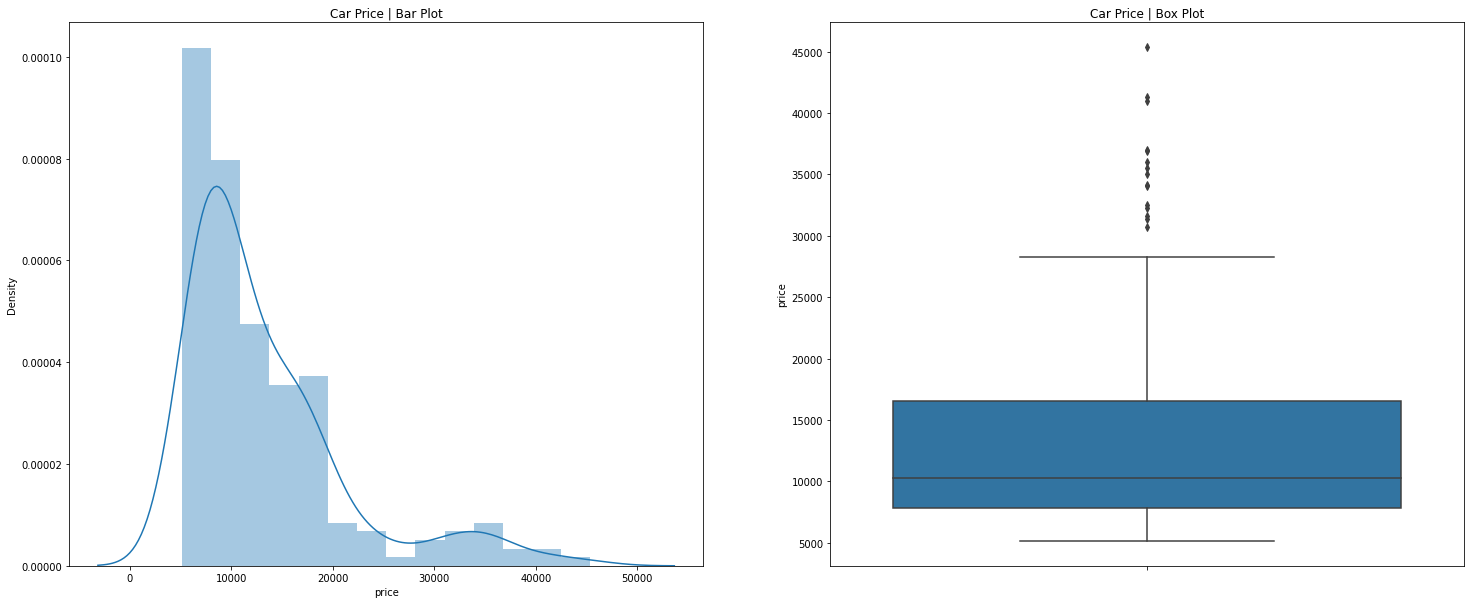

In [14]:
plt.figure(figsize=(25, 10))

plt.subplot(1, 2, 1)
plt.title('Car Price | Bar Plot')
sns.distplot(df.price)

plt.subplot(1, 2, 2)
plt.title('Car Price | Box Plot')
sns.boxplot(y=df.price)

plt.show()

In [15]:
print(df.price.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 1.00]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


/home/red/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


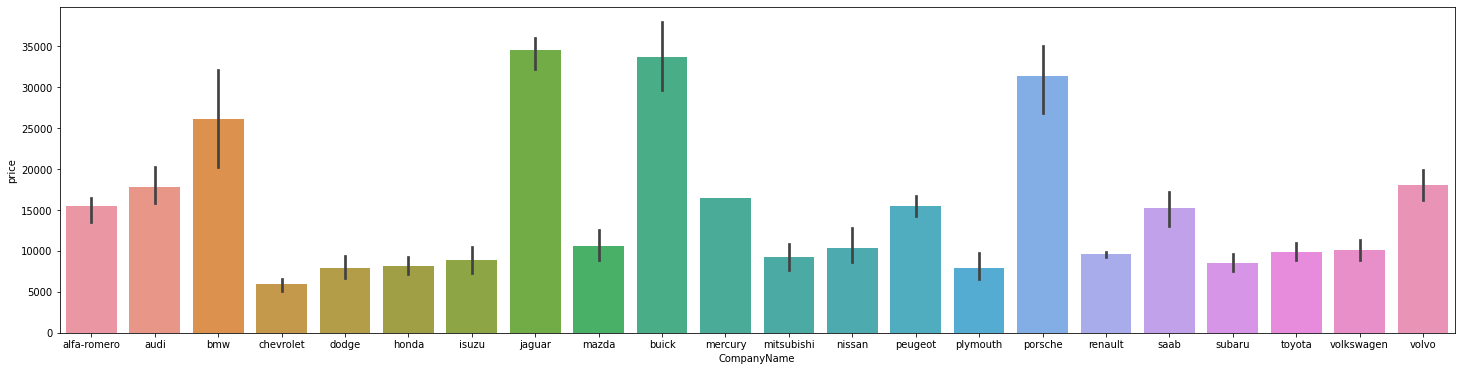

In [16]:
fig = plt.figure(figsize=(25, 6))

sns.barplot(df.CompanyName, df.price)
plt.show()

/home/red/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/red/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/red/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


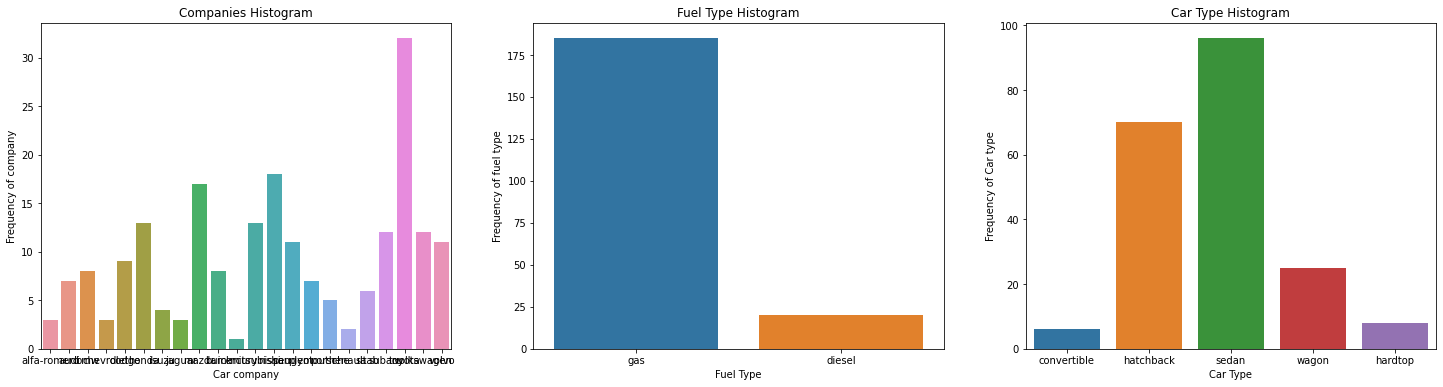

In [17]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = sns.countplot(df.CompanyName)
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = sns.countplot(df.fueltype)
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = sns.countplot(df.carbody)
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

1. **Toyota** favori araç.
2. **Gas** ile çalışan araç **dizel**'den daha fazla.
3. **Sedan** araçlar en çok tercih edilen model.

In [18]:
def plot_feature_and_feature_price(feature):
    plt.figure(figsize=(20,8))

    plt.subplot(1,2,1)
    plt.title(feature + ' Histogram')
    sns.countplot(df['{}'.format(feature)])

    plt.subplot(1,2,2)
    plt.title(feature + 'vs Price')
    sns.boxplot(x=df['{}'.format(feature)], y=df.price)

    plt.show()

In [19]:
def plot_feature_average(feature):
    temp_df = pd.DataFrame(df.groupby(['{}'.format(feature)])['price'].mean().sort_values(ascending = False))
    temp_df.plot.bar(figsize=(8,6))
    plt.title('{} vs Average Price'.format(feature))
    plt.show()

/home/red/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


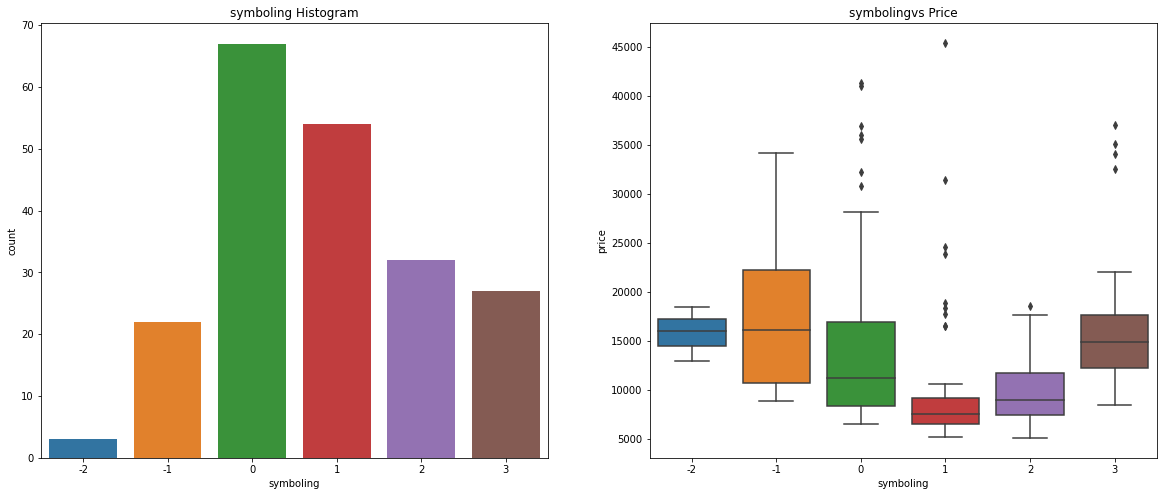

In [20]:
plot_feature_and_feature_price('symboling')

/home/red/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


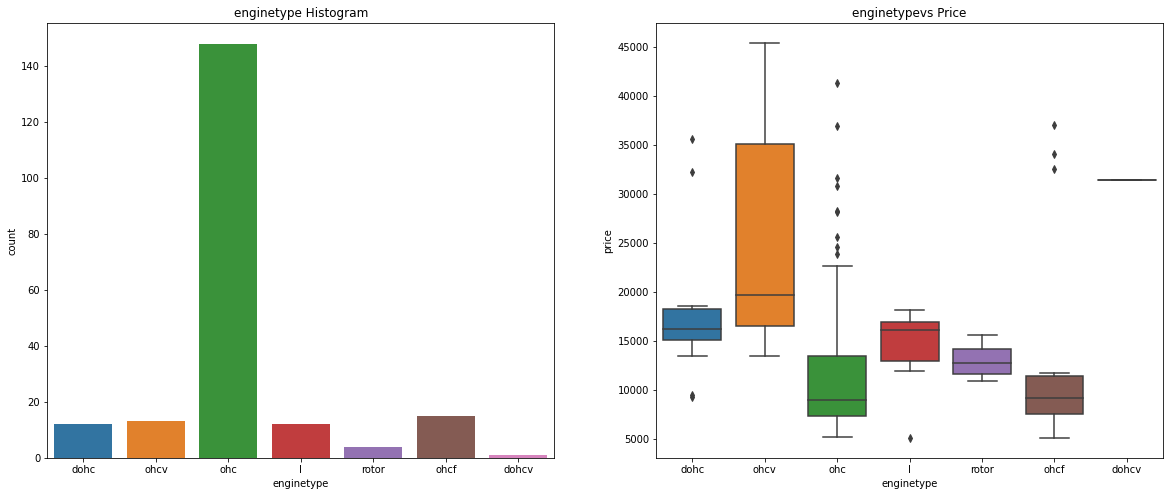

In [21]:
plot_feature_and_feature_price('enginetype')

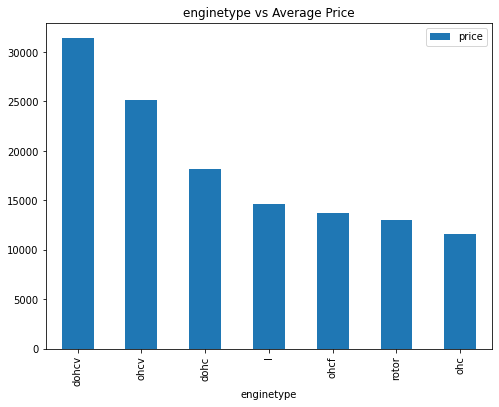

In [22]:
plot_feature_average('enginetype')

1. **OHC** en çok kullanılan motor türü.
2. **OHCV** en pahalı motorlar iken **OHC** ve **OHCF** motorlar ise en ucuz motorlardandır.

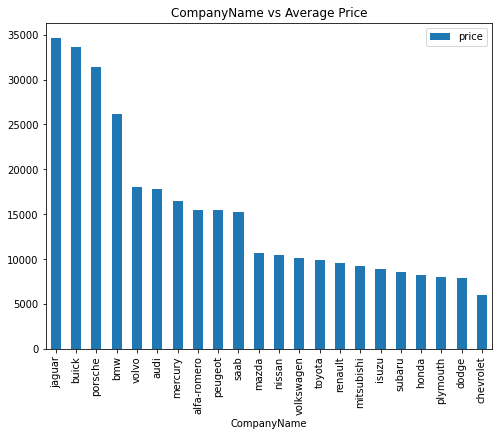

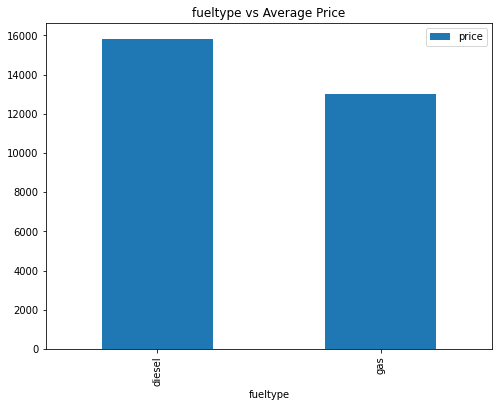

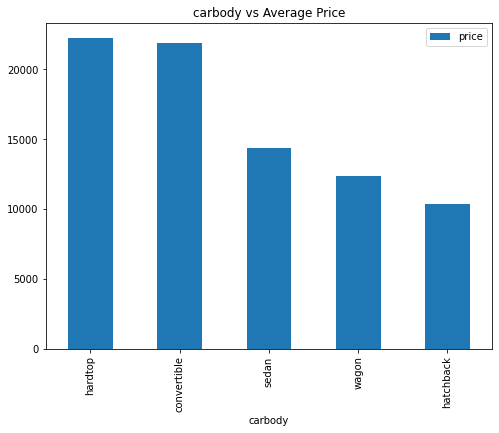

In [23]:
plot_feature_average('CompanyName')
plot_feature_average('fueltype')
plot_feature_average('carbody')

1. *Jaguar* ve *Buick* en pahalı markalardandır.
2. *Dizel* *gaz*'a göre daha pahalıdır.
3. *hardtop* ve *convertible* modelleri diğerlerine göre daha fazla tercih ediliyor.

/home/red/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


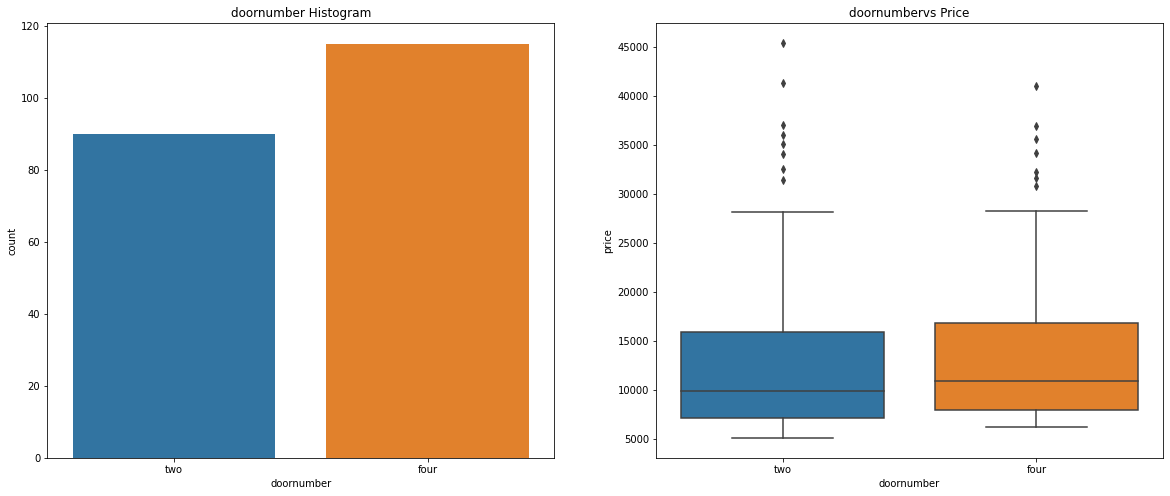

/home/red/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


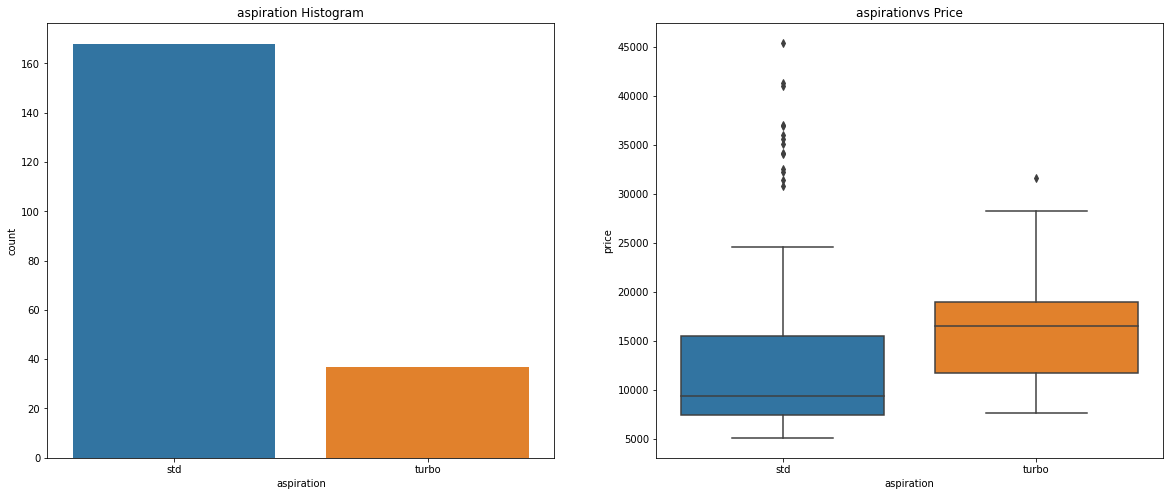

In [24]:
plot_feature_and_feature_price('doornumber')
plot_feature_and_feature_price('aspiration')

1. *doornumber* fiyatları ayırmak için pek etkili bir feature değildir.
2. **Turbo** modeller diğerlerine göre daha yüksek fiyatlandırmaya sahiptir.

/home/red/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


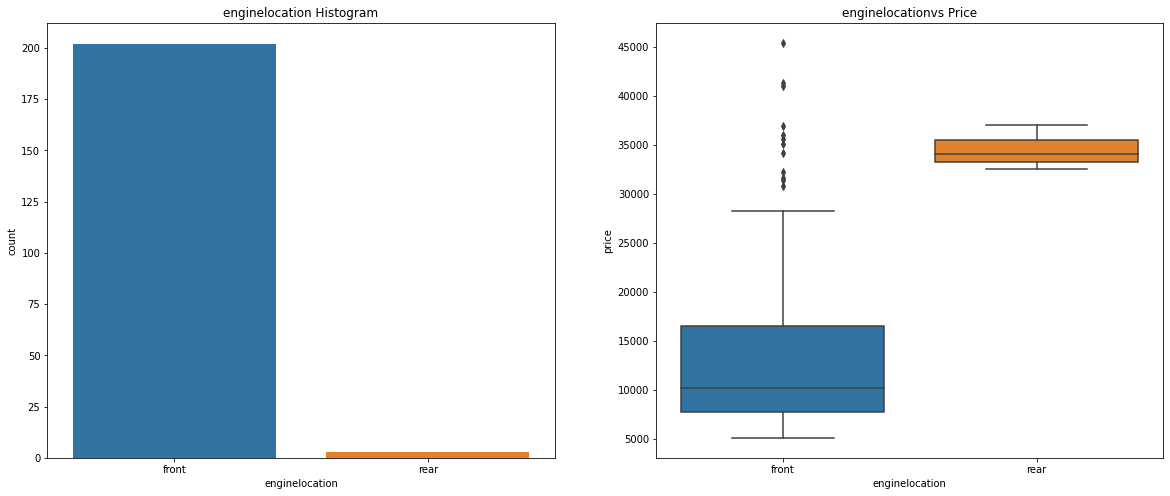

/home/red/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


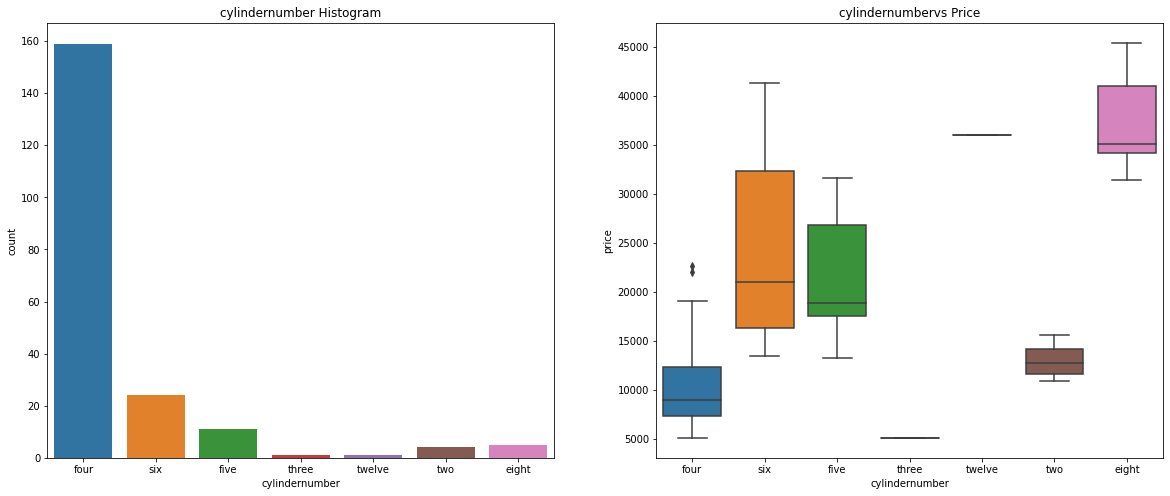

/home/red/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


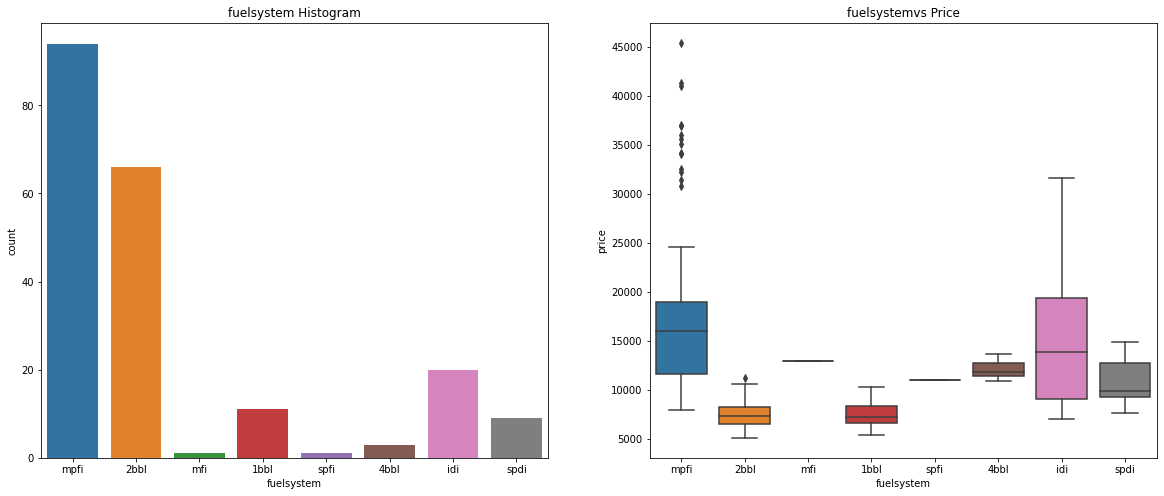

/home/red/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


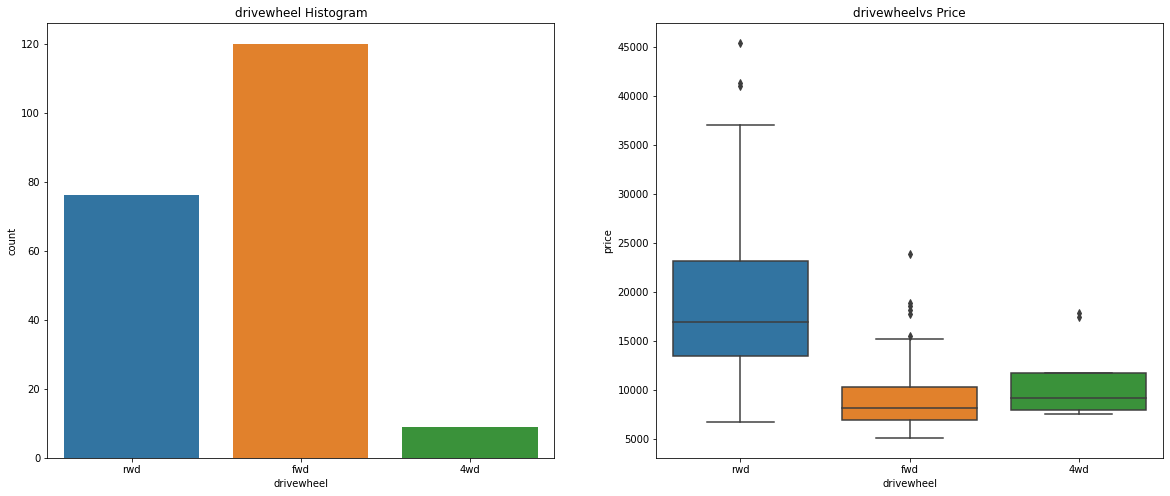

In [25]:
plot_feature_and_feature_price('enginelocation')
plot_feature_and_feature_price('cylindernumber')
plot_feature_and_feature_price('fuelsystem')
plot_feature_and_feature_price('drivewheel')

1. *enginelocation* bazı datalarda öenmli olsa da çoğu data tek tip location bulunuyor.
2. En çok **four, five, six** tipindeki silindirler kullanılıyor.
3. ...

In [26]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

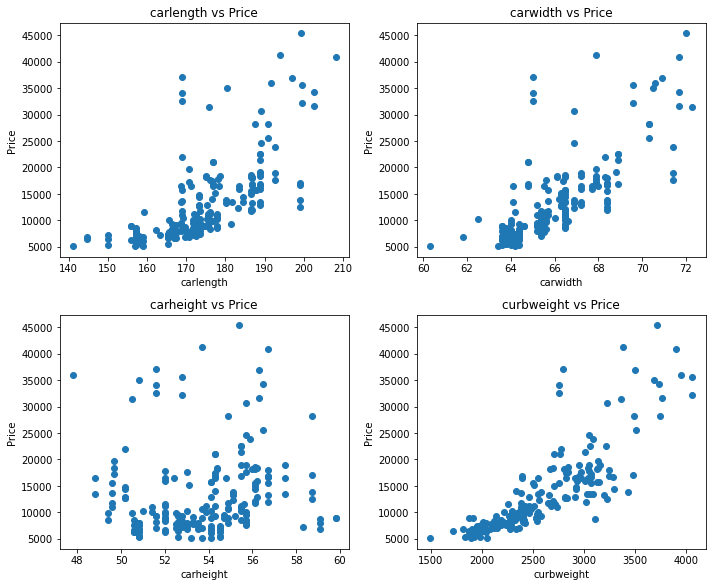

In [27]:
plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

1. *carheight* fiyat ile kıyaslanınca mantıklı bir feature olmadığı gözleniyor.
2. Diğer featureler ise price ile doğrusal bir ilişki bulunduğundan değerli bir feature olarak gözüküyor.

In [28]:
def pair_plot(x, y, z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars='price',height=5, aspect=1, kind='scatter')
    plt.show()

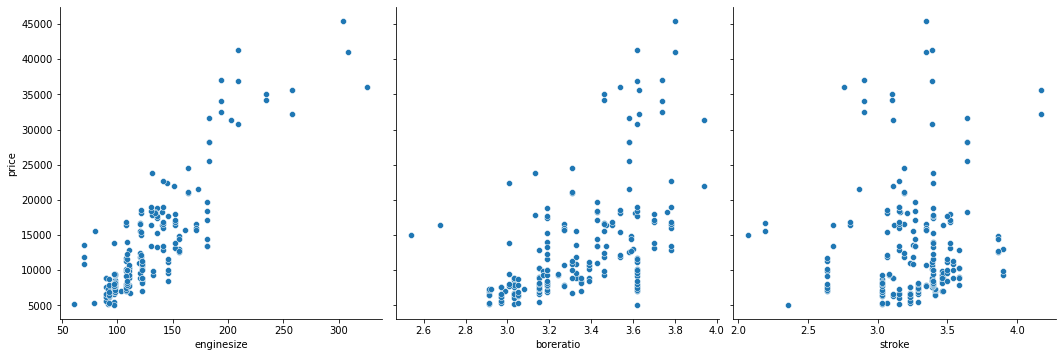

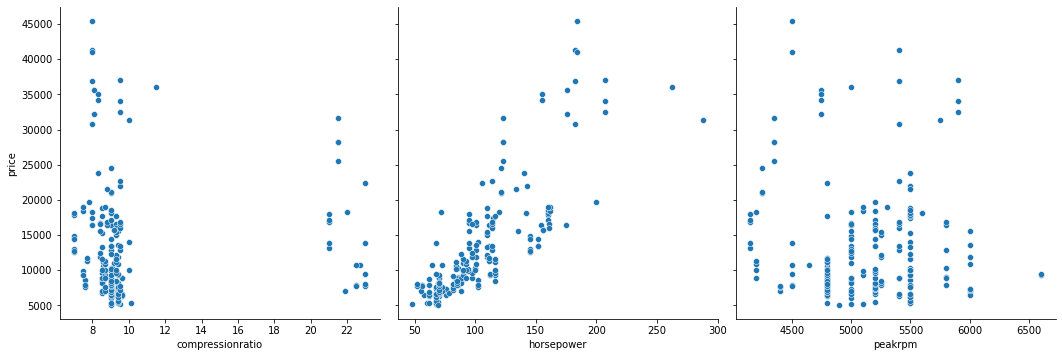

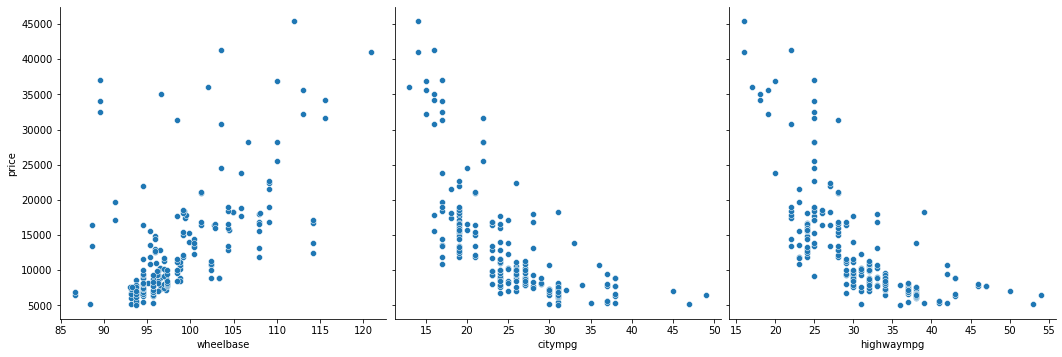

In [29]:
pair_plot('enginesize', 'boreratio', 'stroke')
pair_plot('compressionratio', 'horsepower', 'peakrpm')
pair_plot('wheelbase', 'citympg', 'highwaympg')

1. `enginesize`, `boreratio`, `horsepower`, `wheelbase` araç fiyatları ile doğru bir orantı olduğu gözüküyor.
2. `citympg`, `highwaympg` araç fiyatları ile ters orantı olduğu gözüküyor.

## Deriving new Features

In [30]:
# Yakıt ekonomisi
df['fueleconomy'] = (0.65 * df['citympg']) + (0.35 * df['highwaympg'])

In [31]:
df['price'] = df['price'].astype('int')

In [32]:
temp = df.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df['carsrange'] = pd.cut(temp['price_y'], bins, right=False, labels=cars_bin)
df.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495,23.10,Medium
2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500,23.10,Medium
3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500,21.45,Medium
4,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950,26.10,Medium
5,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450,19.40,Medium


### Bivariate Analysis

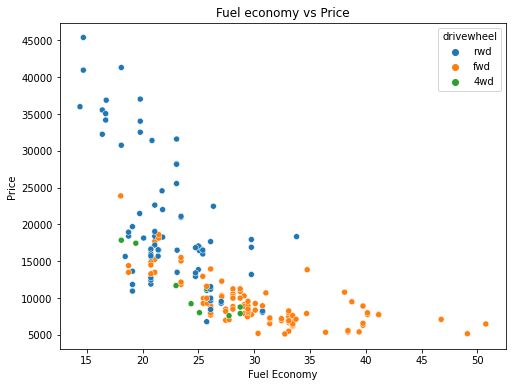

<Figure size 432x288 with 0 Axes>

In [33]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=df['fueleconomy'],y=df['price'],hue=df['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show();
plt.tight_layout()

`fueleconomy` ile `price`'nin açıkca bir şekilde negatif correlation olduğu kesindir.

<Figure size 1800x432 with 0 Axes>

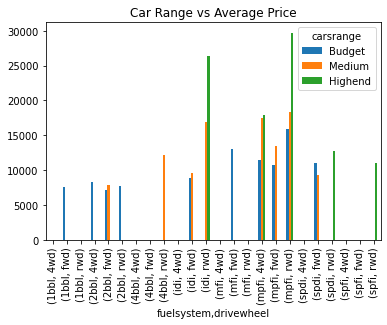

In [34]:
plt.figure(figsize=(25, 6))

df_temp = pd.DataFrame(df.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df_temp.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

#### Etkili olabilecek featureler;

- Car Range 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy 

In [35]:
df_lr = df[['price', 'fueltype', 'aspiration','carbody', 
            'drivewheel','wheelbase','curbweight', 'enginetype', 
            'cylindernumber', 'enginesize', 'boreratio','horsepower', 
            'fueleconomy', 'carlength','carwidth', 'carsrange']]

df_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
car_ID,,,,,,,,,,,,,,,,
1,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.10,168.8,64.1,Medium
2,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.10,168.8,64.1,Medium
3,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,21.45,171.2,65.5,Medium
4,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.10,176.6,66.2,Medium
5,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.40,176.6,66.4,Medium


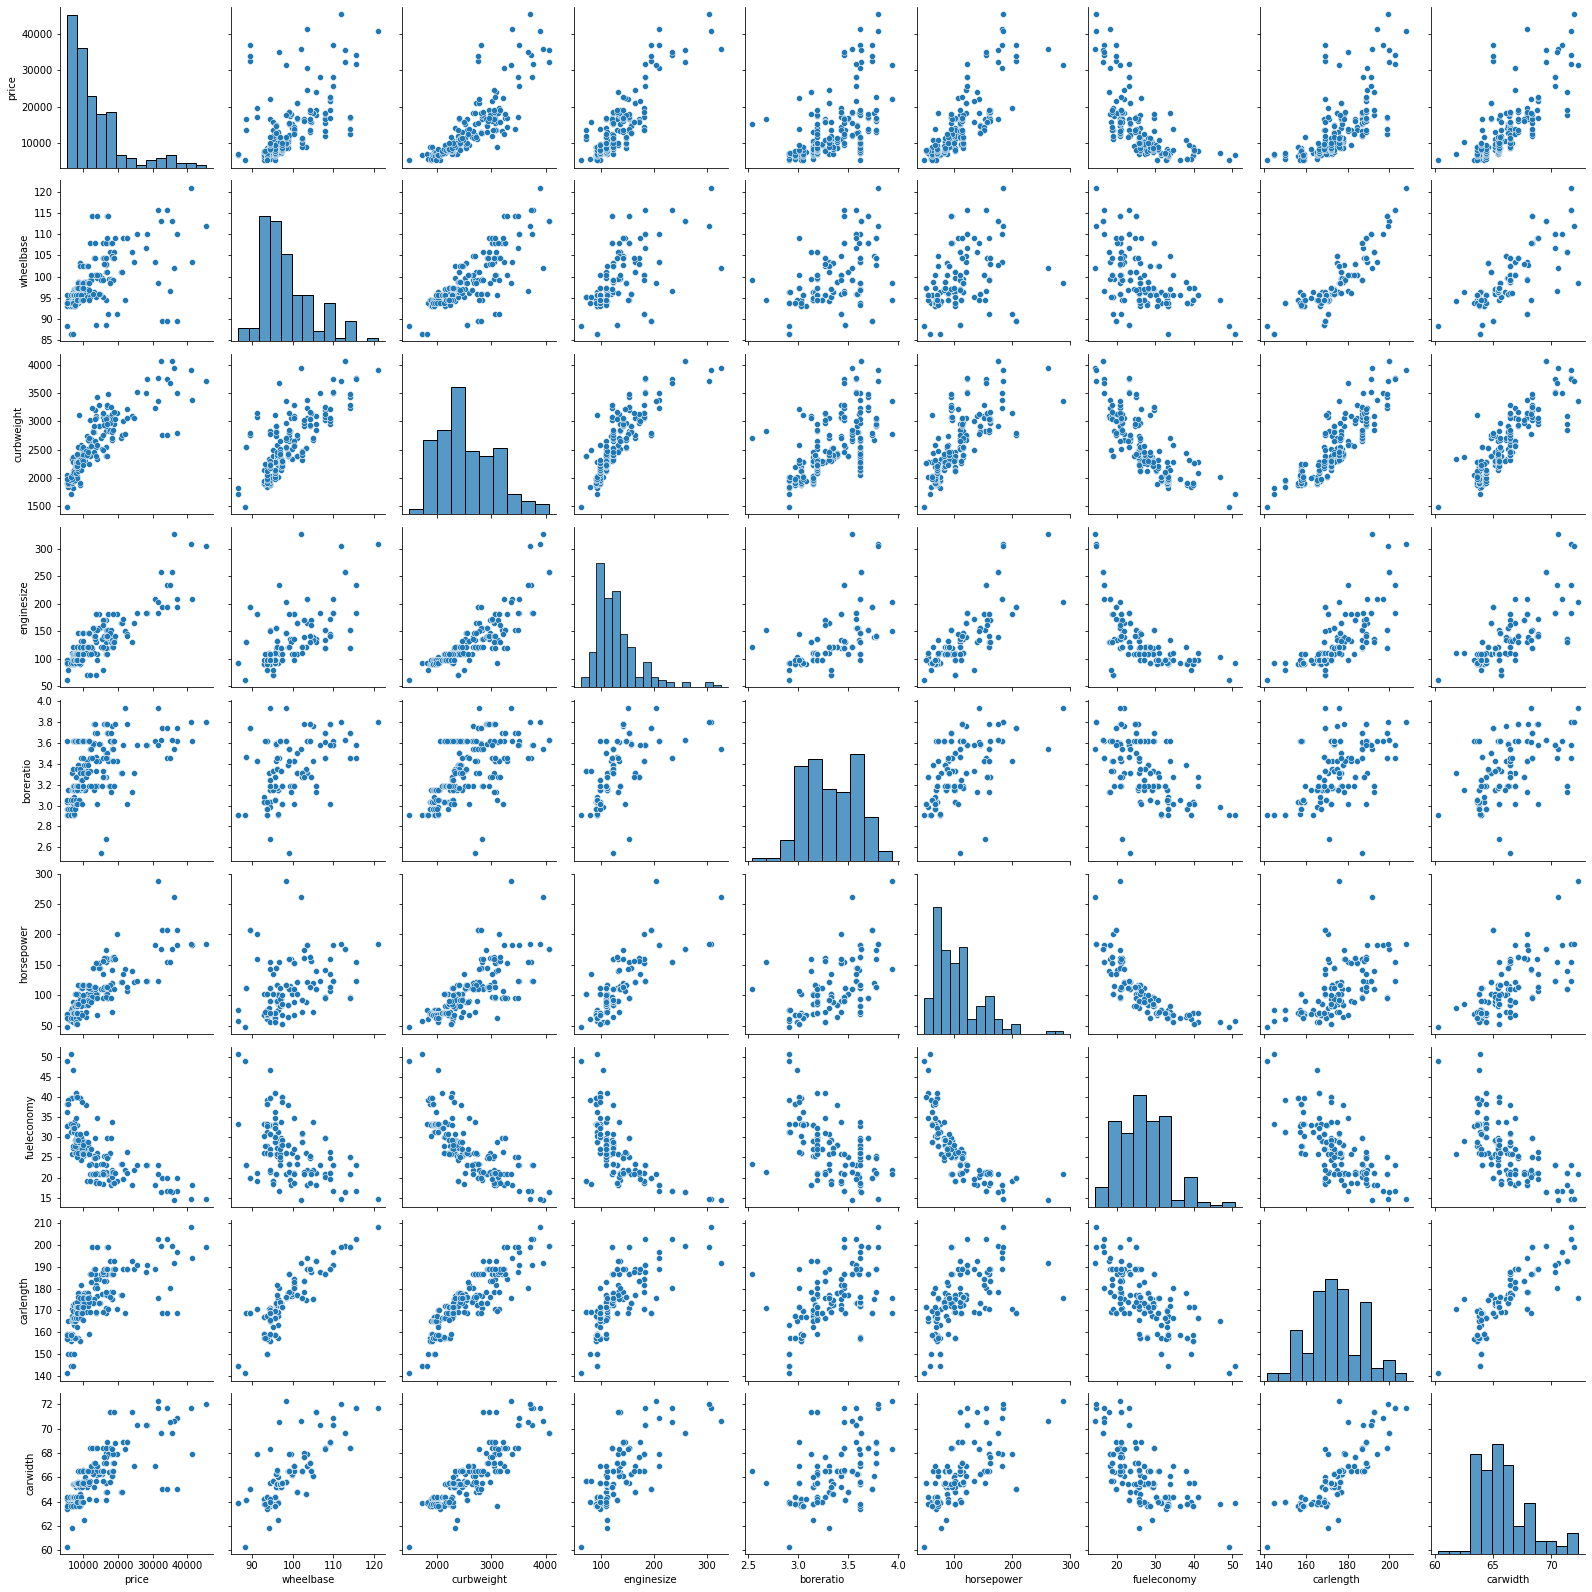

In [36]:
sns.pairplot(df_lr)
plt.show()

#### Dummy Variables

In [37]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

df_lr = dummies('fueltype',df_lr)
df_lr = dummies('aspiration',df_lr)
df_lr = dummies('carbody',df_lr)
df_lr = dummies('drivewheel',df_lr)
df_lr = dummies('enginetype',df_lr)
df_lr = dummies('cylindernumber',df_lr)
df_lr = dummies('carsrange',df_lr)

In [38]:
df_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
car_ID,,,,,,,,,,,,,,,,,,,,,
1,13495,88.6,2548,130,3.47,111,23.10,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,88.6,2548,130,3.47,111,23.10,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
3,16500,94.5,2823,152,2.68,154,21.45,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
4,13950,99.8,2337,109,3.19,102,26.10,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
5,17450,99.4,2824,136,3.19,115,19.40,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


### Split Data

In [39]:
np.random.seed(25)

df_train, df_test = train_test_split(df_lr, test_size=0.25, random_state=25)

In [40]:
scaler = MinMaxScaler()
nine_variables =  ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 
                   'horsepower','fueleconomy','carlength','carwidth','price']

df_train[nine_variables] = scaler.fit_transform(df_train[nine_variables])

<ipython-input-40-5a19b0b3572c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[nine_variables] = scaler.fit_transform(df_train[nine_variables])
/home/red/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [41]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
car_ID,,,,,,,,,,,,,,,,,,,,,
122,0.039075,0.206997,0.194337,0.117409,0.307143,0.083333,0.520111,0.391045,0.291667,1,...,0,0,0,1,0,0,0,0,0,0
39,0.098729,0.288630,0.310706,0.198381,0.435714,0.158333,0.399445,0.394030,0.408333,1,...,0,0,0,1,0,0,0,0,0,0
120,0.070478,0.206997,0.248254,0.149798,0.350000,0.225000,0.316227,0.241791,0.291667,1,...,0,0,0,1,0,0,0,0,0,0
127,0.680453,0.084548,0.491854,0.538462,0.857143,0.662500,0.141470,0.414925,0.391667,1,...,0,0,0,0,1,0,0,0,0,1
31,0.033787,0.000000,0.087277,0.125506,0.264286,0.041667,1.000000,0.052239,0.300000,1,...,0,0,0,1,0,0,0,0,0,0


In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 122 to 133
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        153 non-null    float64
 1   wheelbase    153 non-null    float64
 2   curbweight   153 non-null    float64
 3   enginesize   153 non-null    float64
 4   boreratio    153 non-null    float64
 5   horsepower   153 non-null    float64
 6   fueleconomy  153 non-null    float64
 7   carlength    153 non-null    float64
 8   carwidth     153 non-null    float64
 9   gas          153 non-null    uint8  
 10  turbo        153 non-null    uint8  
 11  hardtop      153 non-null    uint8  
 12  hatchback    153 non-null    uint8  
 13  sedan        153 non-null    uint8  
 14  wagon        153 non-null    uint8  
 15  fwd          153 non-null    uint8  
 16  rwd          153 non-null    uint8  
 17  dohcv        153 non-null    uint8  
 18  l            153 non-null    uint8  
 19  ohc   

In [43]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,...,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.0,153.000000,153.000000,153.000000
mean,0.203723,0.352408,0.410000,0.264772,0.560831,0.233143,0.346858,0.489933,0.467048,0.915033,...,0.052288,0.019608,0.045752,0.777778,0.117647,0.006536,0.0,0.019608,0.424837,0.117647
std,0.202451,0.172827,0.197119,0.167313,0.193637,0.162668,0.191932,0.184193,0.174318,0.279749,...,0.223337,0.139104,0.209632,0.417105,0.323248,0.080845,0.0,0.139104,0.495942,0.323248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.068939,0.230321,0.272304,0.149798,0.421429,0.091667,0.177531,0.376119,0.325000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.127278,0.303207,0.359193,0.238866,0.550000,0.204167,0.316227,0.479104,0.433333,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.283998,0.425656,0.555857,0.323887,0.750000,0.283333,0.463245,0.602985,0.525000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


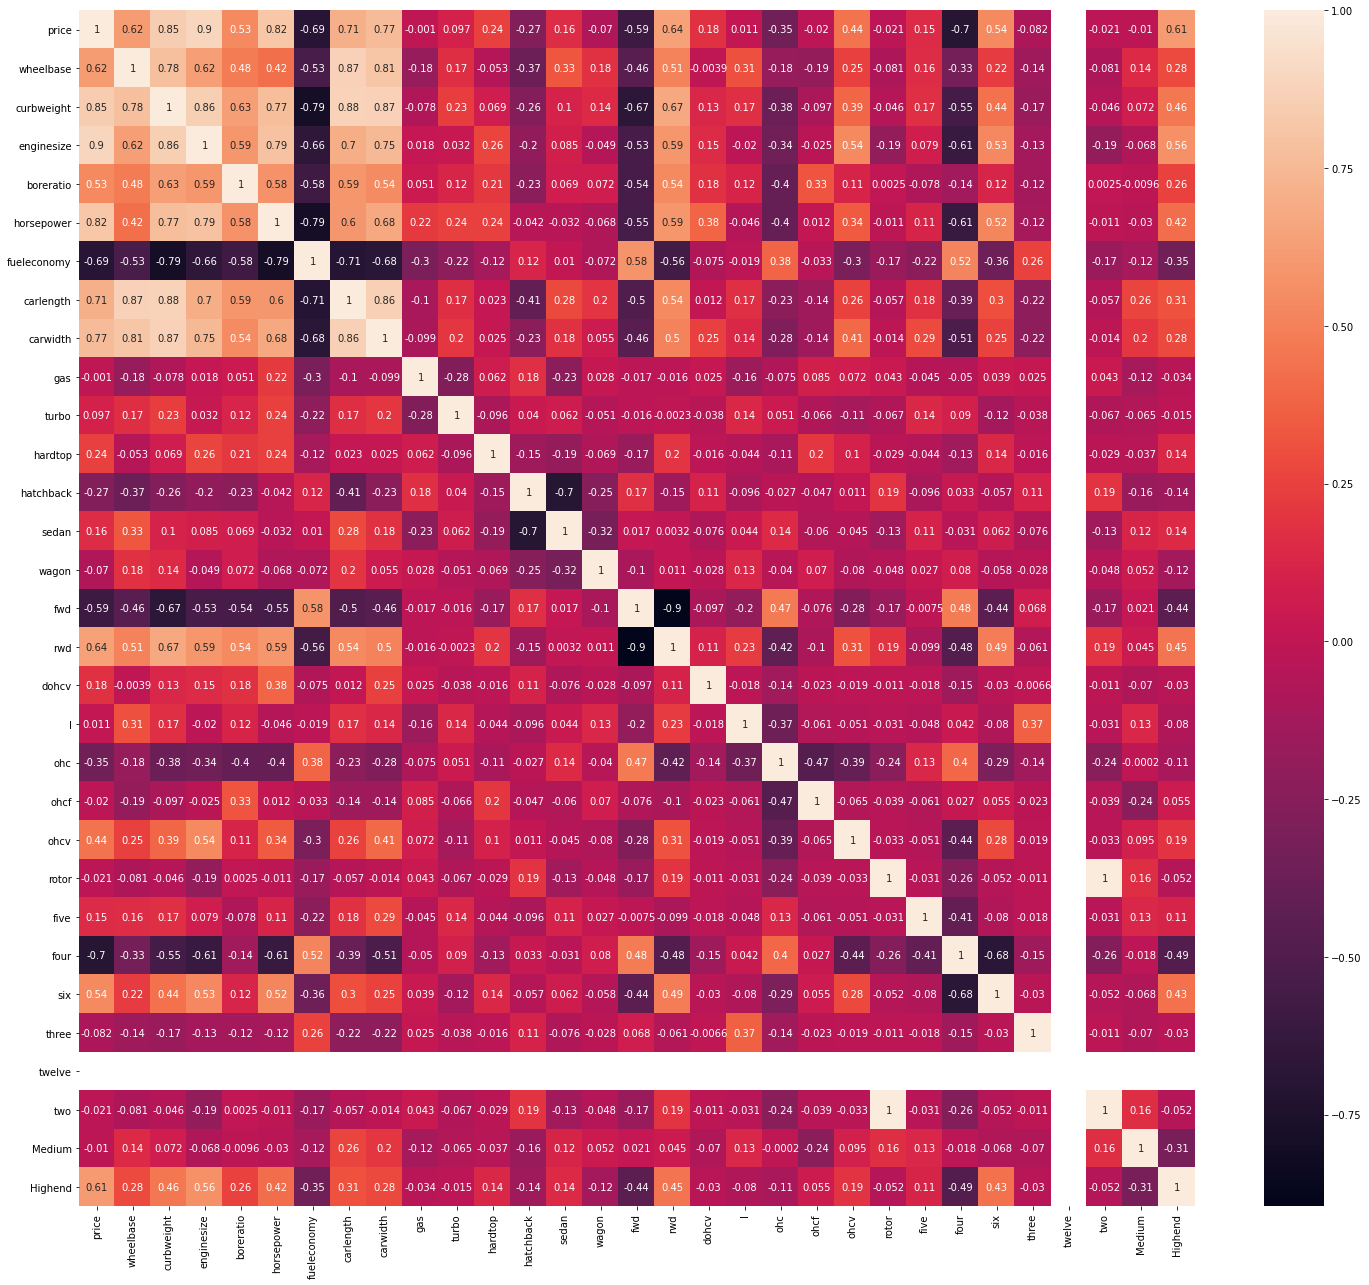

In [44]:
# Check Correlation heatmap
plt.figure(figsize=(25,22))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

In [45]:
y_train = df_train.pop('price')
X_train = df_train

In [46]:
lin_reg_1 = LinearRegression()
lin_reg_1.fit(X_train, y_train)

LinearRegression()

In [47]:
rfe = RFE(lin_reg_1, 10)
rfe = rfe.fit(X_train, y_train)

/home/red/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [48]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('wheelbase', False, 9),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 13),
 ('horsepower', True, 1),
 ('fueleconomy', False, 4),
 ('carlength', False, 15),
 ('carwidth', False, 3),
 ('gas', False, 17),
 ('turbo', False, 18),
 ('hardtop', False, 10),
 ('hatchback', False, 6),
 ('sedan', False, 8),
 ('wagon', False, 7),
 ('fwd', False, 19),
 ('rwd', False, 20),
 ('dohcv', True, 1),
 ('l', False, 14),
 ('ohc', False, 12),
 ('ohcf', False, 11),
 ('ohcv', False, 2),
 ('rotor', True, 1),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('three', True, 1),
 ('twelve', False, 21),
 ('two', True, 1),
 ('Medium', False, 16),
 ('Highend', False, 5)]

In [49]:
X_train.columns[rfe.support_]

Index(['curbweight', 'enginesize', 'horsepower', 'dohcv', 'rotor', 'five',
       'four', 'six', 'three', 'two'],
      dtype='object')

In [50]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,enginesize,horsepower,dohcv,rotor,five,four,six,three,two
car_ID,,,,,,,,,,
122,0.194337,0.117409,0.083333,0,0,0,1,0,0,0
39,0.310706,0.198381,0.158333,0,0,0,1,0,0,0
120,0.248254,0.149798,0.225000,0,0,0,1,0,0,0
127,0.491854,0.538462,0.662500,0,0,0,0,1,0,0
31,0.087277,0.125506,0.041667,0,0,0,1,0,0,0


In [51]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    


In [52]:
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     112.7
Date:                Mon, 03 May 2021   Prob (F-statistic):           2.23e-60
Time:                        22:11:20   Log-Likelihood:                 187.74
No. Observations:                 153   AIC:                            -355.5
Df Residuals:                     143   BIC:                            -325.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1460      0.071      2.045      0.0

In [53]:
X_train_new = X_train_rfe.drop(["two"], axis = 1)
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     112.7
Date:                Mon, 03 May 2021   Prob (F-statistic):           2.23e-60
Time:                        22:11:20   Log-Likelihood:                 187.74
No. Observations:                 153   AIC:                            -355.5
Df Residuals:                     143   BIC:                            -325.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1460      0.071      2.045      0.0

In [54]:
X_train_new = X_train_new.drop(["rotor"], axis = 1)
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     125.3
Date:                Mon, 03 May 2021   Prob (F-statistic):           6.01e-61
Time:                        22:11:20   Log-Likelihood:                 186.51
No. Observations:                 153   AIC:                            -355.0
Df Residuals:                     144   BIC:                            -327.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0543      0.038      1.412      0.1

In [55]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [56]:
checkVIF(X_train_new)

,Features,VIF
0,const,41.71
2,enginesize,5.06
6,four,5.00
1,curbweight,4.44
3,horsepower,4.20
7,six,3.26
5,five,2.03
4,dohcv,1.48
8,three,1.26


In [57]:
X_train_new = X_train_new.drop(["four"], axis = 1)
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     120.4
Date:                Mon, 03 May 2021   Prob (F-statistic):           3.73e-57
Time:                        22:11:20   Log-Likelihood:                 174.57
No. Observations:                 153   AIC:                            -333.1
Df Residuals:                     145   BIC:                            -308.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1210      0.016     -7.604      0.0

In [58]:
checkVIF(X_train_new)

,Features,VIF
0,const,6.14
2,enginesize,4.80
1,curbweight,4.44
3,horsepower,4.19
6,six,1.62
4,dohcv,1.40
5,five,1.08
7,three,1.03


In [59]:
X_train_new = X_train_new.drop(["three"], axis = 1)
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     138.9
Date:                Mon, 03 May 2021   Prob (F-statistic):           9.25e-58
Time:                        22:11:20   Log-Likelihood:                 173.38
No. Observations:                 153   AIC:                            -332.8
Df Residuals:                     146   BIC:                            -311.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1163      0.016     -7.422      0.0

In [60]:
checkVIF(X_train_new)

,Features,VIF
0,const,5.90
2,enginesize,4.80
1,curbweight,4.39
3,horsepower,4.19
6,six,1.62
4,dohcv,1.40
5,five,1.08


In [61]:
X_train_new = X_train_new.drop(["dohcv"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     167.8
Date:                Mon, 03 May 2021   Prob (F-statistic):           6.83e-59
Time:                        22:11:20   Log-Likelihood:                 173.37
No. Observations:                 153   AIC:                            -334.7
Df Residuals:                     147   BIC:                            -316.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1160      0.016     -7.480      0.0

,Features,VIF
0,const,5.83
2,enginesize,4.77
1,curbweight,4.27
3,horsepower,3.12
5,six,1.50
4,five,1.07


### Residual Analysis of Model

In [62]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

/home/red/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

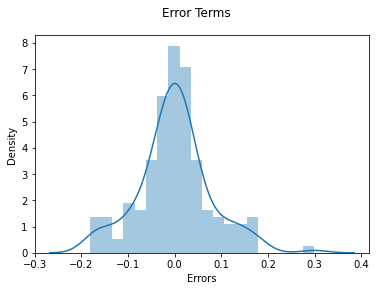

In [63]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms')                  # Plot heading 
plt.xlabel('Errors')   

### Prediction and Evaluation

In [64]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

<ipython-input-64-97839b9b2fc5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
/home/red/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [65]:
y_test = df_test.pop('price')
X_test = df_test

In [66]:
X_train_new = X_train_new.drop('const',axis=1)
X_test_new = X_test[X_train_new.columns]

X_test_new = sm.add_constant(X_test_new)

In [67]:
y_pred = lm.predict(X_test_new)

In [68]:
r2_score(y_test, y_pred)

0.6224457710912731

In [69]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     167.8
Date:                Mon, 03 May 2021   Prob (F-statistic):           6.83e-59
Time:                        22:11:23   Log-Likelihood:                 173.37
No. Observations:                 153   AIC:                            -334.7
Df Residuals:                     147   BIC:                            -316.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1160      0.016     -7.480      0.000      -0.147      -0.085
curbweight     0.2123      0.068      3.140      0.002       0.079       0.346
enginesize     0.6131      0.084      7.281      0.000       0.447       0.780
horsepower     0.2704      0.070      3.865      0.000       0.132       0.409
five           0.0531      0.032      1.667      0.098      -0.010       0.116
six            0.0417      0.024      1.707      0.090      -0.007       0.090
==============================================================================
Omnibus:                        8.493   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               12.225
Skew:                           0.295   Prob(JB):                      0.00222
Kurtosis:                       4.253   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model pek iyi olmadı geliştirilebilir.